<a href="https://colab.research.google.com/github/huzaifawork/Bootstrap-Implementation/blob/main/BFSDFS_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### BFS TREE,GRAPH

In [37]:
from collections import deque

class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

def bfs_tree(root):
    # Check if the tree is empty
    if root is None:
        return []

    result = []  # Store the result of BFS traversal
    queue = deque([root])  # Initialize a deque with the root node

    # Perform BFS traversal
    while queue:
        node = queue.popleft()  # Pop the leftmost node from the deque
        result.append(node.value)  # Add the value of the popped node to the result

        # Add left and right children of the current node to the queue
        if node.left:
            queue.append(node.left)
        if node.right:
            queue.append(node.right)

    return result

def bfs_graph(graph, start):
    # Check if the start node exists in the graph
    if start not in graph:
        return []

    result = []  # Store the result of BFS traversal
    visited = set()  # Set to keep track of visited nodes
    queue = deque([start])  # Initialize a deque with the start node
    visited.add(start)  # Mark the start node as visited

    # Perform BFS traversal
    while queue:
        node = queue.popleft()  # Pop the leftmost node from the deque
        result.append(node)  # Add the popped node to the result

        # Explore neighbors of the current node
        for neighbor in graph[node]:
            # If neighbor is not visited, add it to the queue and mark it as visited
            if neighbor not in visited:
                queue.append(neighbor)
                visited.add(neighbor)

    return result

# Example usage for tree
# Constructing a binary tree
root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
root.left.left = TreeNode(4)
root.left.right = TreeNode(5)
root.right.left = TreeNode(6)
root.right.right = TreeNode(7)

print("BFS traversal of the tree:", bfs_tree(root))

# Example usage for graph
# Constructing a graph using adjacency list
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

start_node = 'A'
print("BFS traversal of the graph:", bfs_graph(graph, start_node))


BFS traversal of the tree: [1, 2, 3, 4, 5, 6, 7]
BFS traversal of the graph: ['A', 'B', 'C', 'D', 'E', 'F']


# DFS TREE GRAPH

In [36]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

def dfs_tree(root):
    # Check if the tree is empty
    if root is None:
        return []

    result = []  # Store the result of DFS traversal
    stack = [root]  # Initialize a stack with the root node

    # Perform DFS traversal
    while stack:
        node = stack.pop()  # Pop the top node from the stack
        result.append(node.value)  # Add the value of the popped node to the result

        # Add right and left children of the current node to the stack
        if node.right:
            stack.append(node.right)
        if node.left:
            stack.append(node.left)

    return result

def dfs_graph(graph, start):
    # Check if the start node exists in the graph
    if start not in graph:
        return []

    result = []  # Store the result of DFS traversal
    visited = set()  # Set to keep track of visited nodes
    stack = [start]  # Initialize a stack with the start node

    # Perform DFS traversal
    while stack:
        node = stack.pop()  # Pop the top node from the stack
        if node not in visited:
            result.append(node)  # Add the popped node to the result
            visited.add(node)  # Mark the popped node as visited

            # Explore neighbors of the current node in reverse order
            for neighbor in reversed(graph[node]):
                stack.append(neighbor)

    return result

# Example usage for tree
# Constructing a binary tree
root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
root.left.left = TreeNode(4)
root.left.right = TreeNode(5)
root.right.left = TreeNode(6)
root.right.right = TreeNode(7)

print("DFS traversal of the tree:", dfs_tree(root))

# Example usage for graph
# Constructing a graph using adjacency list
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

start_node = 'A'
print("DFS traversal of the graph:", dfs_graph(graph, start_node))


DFS traversal of the tree: [1, 2, 4, 5, 3, 6, 7]
DFS traversal of the graph: ['A', 'B', 'D', 'E', 'F', 'C']


# QUESTION 2 : FINDING DFS,BFS TIME

   Range Size  BFS Time (s)  DFS Time (s)
0        1000      0.000459      0.000592
1       40000      0.003457      0.063431
2       80000      0.018425      0.058470
3      200000      0.470927      0.240125
4     1000000      0.466219      0.951972


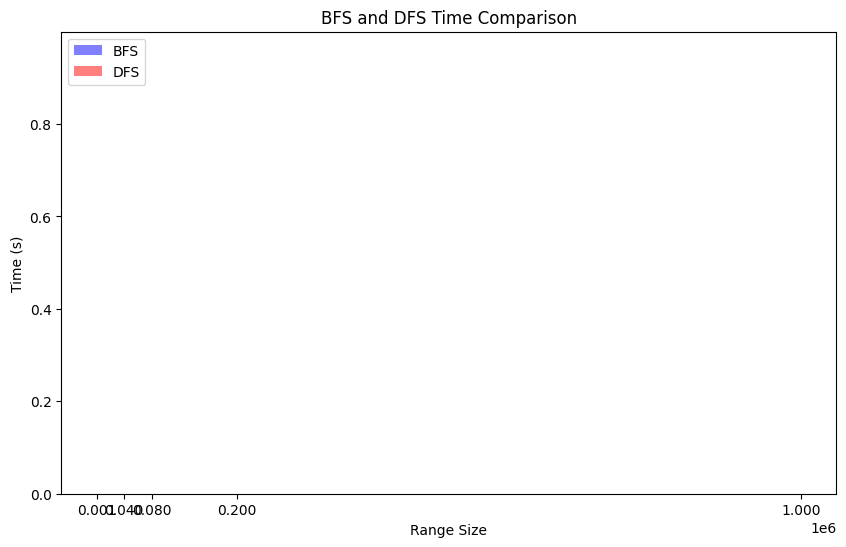

In [38]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

# Define a class for the nodes of the binary tree
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

# Function to generate random unique numbers within given ranges
def generate_random_unique_numbers(range_sizes):
    random_numbers = []
    for size in range_sizes:
        random_numbers.append(np.random.choice(np.arange(1, size+1), size, replace=False))
    return random_numbers

# Function to build a binary tree from a list of numbers
def build_tree(numbers):
    root = None
    for num in numbers:
        root = insert(root, num)
    return root

# Function to insert a value into the binary tree
def insert(root, value):
    if root is None:
        return Node(value)
    if value < root.value:
        root.left = insert(root.left, value)
    else:
        root.right = insert(root.right, value)
    return root

# Breadth-first search algorithm to find a node with a specific value in the tree
def bfs(root, goal):
    queue = [root]
    while queue:
        node = queue.pop(0)
        if node.value == goal:
            return True
        if node.left:
            queue.append(node.left)
        if node.right:
            queue.append(node.right)
    return False

# Depth-first search algorithm to find a node with a specific value in the tree
def dfs(root, goal):
    if root is None:
        return False
    if root.value == goal:
        return True
    left_result = dfs(root.left, goal)
    right_result = dfs(root.right, goal)
    return left_result or right_result

# Function to measure the time taken by BFS and DFS search algorithms
def measure_search_time(root, goal):
    start_time = time.time()
    bfs(root, goal)
    bfs_time = time.time() - start_time

    start_time = time.time()
    dfs(root, goal)
    dfs_time = time.time() - start_time

    return bfs_time, dfs_time

# Main function to execute the code
def main():
    # Define the range sizes for generating random numbers
    range_sizes = [1000, 40000, 80000, 200000, 1000000]
    results = []

    # Iterate over different range sizes
    for size in range_sizes:
        # Generate random unique numbers for the current range size
        numbers = generate_random_unique_numbers([size])[0]
        # Build a binary tree from the generated numbers
        tree = build_tree(numbers)
        # Set a goal value for searching in the tree
        goal = len(numbers) - 220
        # Measure the search time for BFS and DFS algorithms
        bfs_time, dfs_time = measure_search_time(tree, goal)
        # Store the results
        results.append([size, bfs_time, dfs_time])

    # Create a pandas DataFrame from the results
    df = pd.DataFrame(results, columns=['Range Size', 'BFS Time (s)', 'DFS Time (s)'])
    print(df)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.bar(df['Range Size'], df['BFS Time (s)'], color='blue', alpha=0.5, label='BFS')
    plt.bar(df['Range Size'], df['DFS Time (s)'], color='red', alpha=0.5, label='DFS')
    plt.xlabel('Range Size')
    plt.ylabel('Time (s)')
    plt.title('BFS and DFS Time Comparison')
    plt.legend()
    plt.xticks(df['Range Size'])
    plt.show()

# Execute the main function if this script is run directly
if __name__ == "__main__":
    main()


MAZE SOLUTION

In [43]:
import heapq  # Import the heapq module for heap-based priority queue implementation

class Node:
    def __init__(self, position, parent=None):
        self.position = position  # Initialize node position
        self.parent = parent  # Initialize parent node
        self.g = 0  # Initialize cost from start node to current node
        self.h = 0  # Initialize heuristic cost from current node to end node
        self.f = 0  # Initialize total cost (g + h) for comparison in the priority queue

    def __eq__(self, other):
        return self.position == other.position  # Check if two nodes have the same position

    def __lt__(self, other):
        return self.f < other.f  # Implement less than comparison based on total cost 'f' for priority queue ordering

def astar(maze, start, end):
    # Create start and end node
    start_node = Node(start, None)  # Initialize start node
    end_node = Node(end, None)  # Initialize end node

    # Initialize both open and closed list
    open_list = []  # Priority queue for nodes to be evaluated
    closed_list = []  # List for already evaluated nodes

    # Add the start node
    heapq.heappush(open_list, start_node)  # Push start node onto the priority queue

    # Loop until you find the end
    while len(open_list) > 0:  # Continue loop until all nodes are evaluated or end node is found
        # Get the current node
        current_node = heapq.heappop(open_list)  # Pop node with lowest total cost from the priority queue
        closed_list.append(current_node)  # Add current node to the closed list

        # Found the goal
        if current_node == end_node:  # Check if current node is the goal node
            path = []  # Initialize path list to store the final path
            current = current_node
            while current is not None:  # Backtrack from goal node to start node
                path.append(current.position)  # Add current node position to the path
                current = current.parent  # Move to the parent node
            return path[::-1]  # Return reversed path (from start to end)

        # Generate children
        children = []  # Initialize list to store valid child nodes
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0)]:  # Adjacent squares (left, right, up, down)
            # Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # Make sure within range
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) - 1) or node_position[1] < 0:
                continue  # Skip if the position is out of maze bounds

            # Make sure walkable terrain
            if maze[node_position[0]][node_position[1]] != 0:
                continue  # Skip if the position is a wall

            # Create new node
            new_node = Node(node_position, current_node)  # Create a new node with the current node as parent

            # Append
            children.append(new_node)  # Add the new node to the list of children

        # Loop through children
        for child in children:  # Evaluate each child node
            # Child is on the closed list
            for closed_child in closed_list:  # Check if the child node is already evaluated
                if child == closed_child:  # If the child node is in the closed list
                    continue  # Skip evaluating this child

            # Create the f, g, and h values
            child.g = current_node.g + 1  # Increment the cost from the start node to the child node
            child.h = ((child.position[0] - end_node.position[0]) ** 2) + ((child.position[1] - end_node.position[1]) ** 2)  # Calculate heuristic cost (Euclidean distance to end node)
            child.f = child.g + child.h  # Calculate total cost (g + h) for the child node

            # Child is already in the open list
            for open_node in open_list:  # Check if the child node is already in the open list
                if child == open_node and child.g > open_node.g:  # If the child node is in the open list and has a higher cost than the existing one
                    continue  # Skip evaluating this child

            # Add the child to the open list
            heapq.heappush(open_list, child)  # Push the child node onto the priority queue

    return None  # Return None if no path is found

# Define the maze as a list of lists
maze = [
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 1, 1, 0],
    [0, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0]
]

# Define start and end points
start = (0, 0)  # Assuming 'A' is at the top-left corner
end = (5, 5)   # Assuming 'Y' is at the bottom-right corner

# Find the shortest path using A* algorithm
path = astar(maze, start, end)
print(path)  # Print the shortest path


[(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (3, 3), (4, 3), (5, 3), (5, 4), (5, 5)]


# ALPHA BETA PRUNING ALGORITHM

In [42]:
def minimax_alpha_beta(node, depth, maximizing_player, alpha, beta):
    # Base case: if reached maximum depth or node is a terminal node, return its evaluation
    if depth == 0 or node.is_terminal():
        return node.evaluate()

    if maximizing_player:  # If it's maximizing player's turn
        value = float('-inf')  # Initialize value to negative infinity
        for child in node.get_children():  # For each child node
            # Recursively call minimax on child node with depth decreased by 1
            value = max(value, minimax_alpha_beta(child, depth - 1, False, alpha, beta))
            alpha = max(alpha, value)  # Update alpha value
            if alpha >= beta:  # If alpha is greater than or equal to beta, prune remaining branches
                break
        return value  # Return the maximum value found

    else:  # If it's minimizing player's turn
        value = float('inf')  # Initialize value to positive infinity
        for child in node.get_children():  # For each child node
            # Recursively call minimax on child node with depth decreased by 1
            value = min(value, minimax_alpha_beta(child, depth - 1, True, alpha, beta))
            beta = min(beta, value)  # Update beta value
            if alpha >= beta:  # If alpha is greater than or equal to beta, prune remaining branches
                break
        return value  # Return the minimum value found

# Example usage:
class Node:
    def __init__(self, value):
        self.value = value
        self.children = []  # List to store child nodes

    def is_terminal(self):
        return not self.children  # Check if the node is a terminal node (no children)

    def evaluate(self):
        return self.value  # Return the value of the node

    def get_children(self):
        return self.children  # Return the list of child nodes

# Create a sample tree
root = Node(3)  # Root node with value 3
root.children = [Node(5), Node(2), Node(9)]  # Children of root node
root.children[0].children = [Node(1), Node(8)]  # Children of first child of root node
root.children[1].children = [Node(6), Node(7)]  # Children of second child of root node
root.children[2].children = [Node(4)]  # Children of third child of root node

# Call minimax with alpha-beta pruning
best_value = minimax_alpha_beta(root, depth=3, maximizing_player=True, alpha=float('-inf'), beta=float('inf'))
print("Best value:", best_value)  # Print the best value found


Best value: 6
